In [2]:
# Importando librerias necesarias

import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import random
import time
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
import pandas as pd
import seaborn as sns
import scipy.stats as stats
#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Algoritmos de predicción

In [3]:
# Cargando datos
data_final = pd.read_csv('data_final.csv')

# "poca" entre 0 y 3 anios
# "moderada" entre 4 y 6 anios
# "alta" mas de 6 anios


data_final['diferenciaEdad'] = abs(data_final['edadHombre'] - data_final['edadMujer'])
data_final['diferenciaEdad'] = data_final['diferenciaEdad'].apply(lambda x: 'poca' if x <= 3 else ('moderada' if x <= 6 else 'alta'))

data_final = data_final.replace(0, -1)

data_final.head()


,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,departamentoRegistro,mesRegistro,anioRegistro,diferenciaEdad
0,15,15,3,-1,-1,29,31,1,1,7,1,2012,poca
1,20,-1,1,2,-1,21,17,-1,1,21,12,2011,moderada
2,28,6,3,-1,-1,58,53,1,1,7,11,2011,moderada
3,6,6,1,1,1,31,24,5,4,7,11,2011,alta
4,8,6,1,1,1,27,25,4,4,18,1,2012,poca


In [4]:
# recategorizando la variable ocupacionHombre

# Si 1, 23, 41 - Trabajos de campo
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'trabajoCampo' if x in [1, 23, 41] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'trabajoCampo' if x in [1, 23, 41] else x)

# si 2, 10, 16, 17, 20 - Manufactura/Produccion
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'manufactura/produccion' if x in [2, 10, 16, 17, 20] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'manufactura/produccion' if x in [2, 10, 16, 17, 20] else x)

# si 4, 19, 24 - Manejo de maquinaria
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'manejoMaquinaria' if x in [4, 19, 24] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'manejoMaquinaria' if x in [4, 19, 24] else x)

# si 5, 6, 7, 11 - Gestion/Direccion 
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'gestion/direccion' if x in [5, 6, 7, 11, 12] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'gestion/direccion' if x in [5, 6, 7, 11, 12] else x)

# si 8, 18, 21, 32 - Administracion
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'administracionNegocios' if x in [8, 18, 21, 32] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'administracionNegocios' if x in [8, 18, 21, 32] else x)

# si 9, 39, 40 - ServicioCliente/Ventas
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'servicioCliente/ventas' if x in [3, 9, 39, 40] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'servicioCliente/ventas' if x in [3, 9, 39, 40] else x)

# si 13, 35 - Limpieza
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'limpieza' if x in [13, 35] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'limpieza' if x in [13, 35] else x)

# si 15, 22, 25 - Seguridad
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'seguridad' if x in [15, 22, 25] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'seguridad' if x in [15, 22, 25] else x)

# si 26 - Educacion
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'educacion' if x in [26] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'educacion' if x in [26] else x)

# si 27, 30 - Salud
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'salud' if x in [27, 30, 36] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'salud' if x in [27, 30, 36] else x)

# si 31, 34 - Servicios Juridicos
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'serviciosJuridicos' if x in [31, 34] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'serviciosJuridicos' if x in [31, 34] else x)

# si 28, 29, 33, 37, 38 - Ciencias/Tecnologia
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'ciencias/tecnologia' if x in [28, 29, 33, 37, 38] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'ciencias/tecnologia' if x in [28, 29, 33, 37, 38] else x)

# si 14 - No especificado
data_final['ocupacionHombre'] = data_final['ocupacionHombre'].apply(lambda x: 'noEspecificado' if x in [0, -1, 14] else x)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].apply(lambda x: 'noEspecificado' if x in [0, -1, 14] else x)


In [5]:
data_final

,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,departamentoRegistro,mesRegistro,anioRegistro,diferenciaEdad
0,seguridad,seguridad,3,-1,-1,29,31,1,1,7,1,2012,poca
1,manufactura/produccion,noEspecificado,1,2,-1,21,17,-1,1,21,12,2011,moderada
2,ciencias/tecnologia,gestion/direccion,3,-1,-1,58,53,1,1,7,11,2011,moderada
3,gestion/direccion,gestion/direccion,1,1,1,31,24,5,4,7,11,2011,alta
4,administracionNegocios,gestion/direccion,1,1,1,27,25,4,4,18,1,2012,poca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394650,educacion,noEspecificado,1,2,2,32,26,4,2,8,4,2016,moderada
394651,trabajoCampo,noEspecificado,1,2,2,23,31,-1,1,8,3,2016,alta
394652,trabajoCampo,noEspecificado,1,2,2,27,31,-1,2,8,4,2016,moderada
394653,trabajoCampo,noEspecificado,1,2,2,34,34,1,1,8,4,2016,poca


In [6]:
# trabajosCampo -> 1, manufactura/produccion -> 2, manejoMaquinaria -> 3, gestion/direccion -> 4, administracionNegocios -> 5, servicioCliente/ventas -> 6,
# limpieza -> 7, seguridad -> 8, educacion -> 9, salud -> 10, serviciosJuridicos -> 11, ciencias/tecnologia -> 12, noEspecificado -> 13.

fields = { 'trabajoCampo': 1, 'manufactura/produccion': 2, 'manejoMaquinaria': 3, 'gestion/direccion': 4, 'administracionNegocios': 5, 'servicioCliente/ventas': 6,
            'limpieza': 7, 'seguridad': 8, 'educacion': 9, 'salud': 10, 'serviciosJuridicos': 11, 'ciencias/tecnologia': 12, 'noEspecificado': 13 }

data_final['ocupacionHombre'] = data_final['ocupacionHombre'].map(fields)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].map(fields)

In [7]:
data_final

,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,departamentoRegistro,mesRegistro,anioRegistro,diferenciaEdad
0,8,8,3,-1,-1,29,31,1,1,7,1,2012,poca
1,2,13,1,2,-1,21,17,-1,1,21,12,2011,moderada
2,12,4,3,-1,-1,58,53,1,1,7,11,2011,moderada
3,4,4,1,1,1,31,24,5,4,7,11,2011,alta
4,5,4,1,1,1,27,25,4,4,18,1,2012,poca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394650,9,13,1,2,2,32,26,4,2,8,4,2016,moderada
394651,1,13,1,2,2,23,31,-1,1,8,3,2016,alta
394652,1,13,1,2,2,27,31,-1,2,8,4,2016,moderada
394653,1,13,1,2,2,34,34,1,1,8,4,2016,poca


In [8]:
data_final.to_csv('data_no_codificada.csv', index=False)

In [9]:
data_w_names = pd.read_csv('data_no_codificada.csv')

fields_viceversa = {
    1: 'trabajoCampo', 2: 'manufactura/produccion', 3: 'manejoMaquinaria', 4: 'gestion/direccion', 
    5:'administracionNegocios', 6:'servicioCliente/ventas', 7: 'limpieza', 8: 'seguridad', 
    9: 'educacion', 10: 'salud', 11: 'serviciosJuridicos', 12: 'ciencias/tecnologia', 
    13: 'noEspecificado'
    }

data_final['ocupacionHombre'] = data_final['ocupacionHombre'].map(fields_viceversa)
data_final['ocupacionMujer'] = data_final['ocupacionMujer'].map(fields_viceversa)

union_fields = {1: 'Comunidad de gananciales', 2: 'ComunidadAbsoluta', 3: 'SeparacionAbsoluta', -1: 'noEspecificado'}
data_final['claseUnion'] = data_final['claseUnion'].map(union_fields)

etnic_group_fields = {1:'Ladino', 2: 'Indigena', -1: 'noEspecificado'}
data_final['grupoEtnicoHombre'] = data_final['grupoEtnicoHombre'].map(etnic_group_fields)
data_final['grupoEtnicoMujer'] = data_final['grupoEtnicoMujer'].map(etnic_group_fields)


education_fields = {1: 'Ninguno', 2:'Primaria', 3:'Básico', 4:'Diversificado', 5:'Universitario', 6:'Postgrado', -1:'noEspecificado'}
data_final['educacionHombre'] = data_final['educacionHombre'].map(education_fields)
data_final['educacionMujer'] = data_final['educacionMujer'].map(education_fields)

department_fields = {1: 'Alta_Verapaz', 2: 'Baja_Verapaz', 3:'Chimaltenango', 4:'Chiquimula', 
                     5:'El_Progreso', 6:'Escuintla', 7:'Guatemala', 8:'Huehuetenango', 9:'Izabal', 
                     10:'Jalapa', 11:'Jutiapa', 12:'Peten', 13:'Quetzaltenango', 14:'Quiche', 15:'Retalhuleu', 
                    16:'Sacatepequez', 17:'San Marcos', 18:'Santa Rosa', 19:'Solola', 20:'Suchitepequez', 
                    21:'Totonicapan', 22:'Zacapa'}

data_final['departamentoRegistro'] = data_final['departamentoRegistro'].map(department_fields)

month_fields = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 
                    11:'Noviembre', 12:'Diciembre', -1: 'noEspecificado'}

data_final['mesRegistro'] = data_final['mesRegistro'].map(month_fields)


In [10]:
data_final

,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,edadHombre,edadMujer,educacionHombre,educacionMujer,departamentoRegistro,mesRegistro,anioRegistro,diferenciaEdad
0,seguridad,seguridad,SeparacionAbsoluta,noEspecificado,noEspecificado,29,31,Ninguno,Ninguno,Guatemala,Enero,2012,poca
1,manufactura/produccion,noEspecificado,Comunidad de gananciales,Indigena,noEspecificado,21,17,noEspecificado,Ninguno,Totonicapan,Diciembre,2011,moderada
2,ciencias/tecnologia,gestion/direccion,SeparacionAbsoluta,noEspecificado,noEspecificado,58,53,Ninguno,Ninguno,Guatemala,Noviembre,2011,moderada
3,gestion/direccion,gestion/direccion,Comunidad de gananciales,Ladino,Ladino,31,24,Universitario,Diversificado,Guatemala,Noviembre,2011,alta
4,administracionNegocios,gestion/direccion,Comunidad de gananciales,Ladino,Ladino,27,25,Diversificado,Diversificado,Santa Rosa,Enero,2012,poca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394650,educacion,noEspecificado,Comunidad de gananciales,Indigena,Indigena,32,26,Diversificado,Primaria,Huehuetenango,Abril,2016,moderada
394651,trabajoCampo,noEspecificado,Comunidad de gananciales,Indigena,Indigena,23,31,noEspecificado,Ninguno,Huehuetenango,Marzo,2016,alta
394652,trabajoCampo,noEspecificado,Comunidad de gananciales,Indigena,Indigena,27,31,noEspecificado,Primaria,Huehuetenango,Abril,2016,moderada
394653,trabajoCampo,noEspecificado,Comunidad de gananciales,Indigena,Indigena,34,34,Ninguno,Ninguno,Huehuetenango,Abril,2016,poca


In [11]:
data_final['ocupacionHombre'].value_counts()
data_final['ocupacionMujer'].value_counts()

data_final['claseUnion'].value_counts()

data_final['grupoEtnicoHombre'].value_counts()
data_final['grupoEtnicoMujer'].value_counts()

data_final['educacionHombre'].value_counts()
data_final['educacionMujer'].value_counts()

data_final['departamentoRegistro'].value_counts()

data_final['mesRegistro'].value_counts()


Diciembre     38877
Enero         38232
Mayo          35362
Marzo         35146
Abril         33129
Noviembre     32087
Febrero       31833
Agosto        31728
Junio         30490
Julio         30240
Octubre       29870
Septiembre    27661
Name: mesRegistro, dtype: int64

In [12]:
data_final.to_csv('data_named.csv', index=False)

In [13]:
data_redes = pd.read_csv('data_named.csv')

In [14]:
#if 'diferenciaEdad' in data_redes.columns:
#    data_redes = data_redes.drop(columns=['diferenciaEdad'])

#data_redes

In [15]:
one_hot_oh = OrdinalEncoder()
one_hot_om = OrdinalEncoder()
one_hot_cu = OrdinalEncoder()
one_hot_geh = OrdinalEncoder()
one_hot_gem = OrdinalEncoder()
one_hot_dep = OrdinalEncoder()
one_hot_ord_ed = OrdinalEncoder()
one_hot_ord_em = OrdinalEncoder()
one_hot_ord_mes = OrdinalEncoder()
one_hot_dif = OrdinalEncoder()


oh_enc = one_hot_oh.fit_transform(data_redes[['ocupacionHombre']])
om_enc = one_hot_om.fit_transform(data_redes[['ocupacionMujer']])
cu_enc = one_hot_cu.fit_transform(data_redes[['claseUnion']])
geh_enc = one_hot_geh.fit_transform(data_redes[['grupoEtnicoHombre']])
gem_enc = one_hot_gem.fit_transform(data_redes[['grupoEtnicoMujer']])
dep_enc = one_hot_dep.fit_transform(data_redes[['departamentoRegistro']])
ed_enc = one_hot_ord_ed.fit_transform(data_redes[['educacionHombre']])
em_enc = one_hot_ord_em.fit_transform(data_redes[['educacionMujer']])
mes_enc = one_hot_ord_mes.fit_transform(data_redes[['mesRegistro']])
dif_enc = one_hot_dif.fit_transform(data_redes[['diferenciaEdad']])

oh_enc_df = pd.DataFrame(oh_enc, columns=['ocupacionHombre'], index=data_redes.index)
om_enc_df = pd.DataFrame(om_enc, columns=['ocupacionMujer'], index=data_redes.index)
cu_enc_df = pd.DataFrame(cu_enc, columns=['claseUnion'], index=data_redes.index)
geh_enc_df = pd.DataFrame(geh_enc, columns=['grupoEtnicoHombre'], index=data_redes.index)
gem_enc_df = pd.DataFrame(gem_enc, columns=['grupoEtnicoMujer'], index=data_redes.index)
dep_enc_df = pd.DataFrame(dep_enc, columns=['departamentoRegistro'], index=data_redes.index)
ed_enc_df = pd.DataFrame(ed_enc, columns=['educacionHombre'], index=data_redes.index)
em_enc_df = pd.DataFrame(em_enc, columns=['educacionMujer'], index=data_redes.index)
mes_enc_df = pd.DataFrame(mes_enc, columns=['mesRegistro'], index=data_redes.index)
dif_enc_df = pd.DataFrame(dif_enc, columns=['diferenciaEdad'], index=data_redes.index)


data_redes = data_redes.drop(columns=['ocupacionHombre', 'ocupacionMujer', 'claseUnion', 'grupoEtnicoHombre', 'grupoEtnicoMujer', 'departamentoRegistro', 'educacionHombre', 'educacionMujer', 'mesRegistro', 'diferenciaEdad'])

data_redes = pd.concat([data_redes, oh_enc_df, om_enc_df, cu_enc_df, geh_enc_df, gem_enc_df, dep_enc_df, ed_enc_df, em_enc_df, mes_enc_df, dif_enc_df], axis=1)

data_redes

,edadHombre,edadMujer,anioRegistro,ocupacionHombre,ocupacionMujer,claseUnion,grupoEtnicoHombre,grupoEtnicoMujer,departamentoRegistro,educacionHombre,educacionMujer,mesRegistro,diferenciaEdad
0,29,31,2012,9.0,9.0,2.0,2.0,2.0,6.0,2.0,2.0,3.0,2.0
1,21,17,2011,6.0,7.0,0.0,0.0,2.0,20.0,6.0,2.0,2.0,1.0
2,58,53,2011,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,9.0,1.0
3,31,24,2011,3.0,3.0,0.0,1.0,1.0,6.0,5.0,1.0,9.0,0.0
4,27,25,2012,0.0,3.0,0.0,1.0,1.0,17.0,1.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394650,32,26,2016,2.0,7.0,0.0,0.0,0.0,7.0,1.0,4.0,0.0,1.0
394651,23,31,2016,12.0,7.0,0.0,0.0,0.0,7.0,6.0,2.0,7.0,0.0
394652,27,31,2016,12.0,7.0,0.0,0.0,0.0,7.0,6.0,4.0,0.0,1.0
394653,34,34,2016,12.0,7.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0


In [16]:
# Dividir el dataset en X e y
y = data_redes['diferenciaEdad']
X = data_redes.drop(['diferenciaEdad'], axis=1)

# 30% de los datos para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=123)

In [17]:
scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

mlp1 = MLPClassifier(hidden_layer_sizes = (12,)*20, max_iter = 3000, activation='relu', random_state=123)
mlp1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                                  12, 12, 12, 12, 12, 12, 12, 12, 12),
              max_iter=3000, random_state=123)

In [18]:
y_pred = mlp1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)

print(cm1)
print()

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))

[[23777     0  2517]
 [    0 24046  5333]
 [    0     0 62724]]

Accuracy:  0.933697644365989
Precision:  0.9629230783763614
Recall:  0.9075835071684882


/Users/saramariapaguagagonzales/opt/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saramariapaguagagonzales/opt/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saramariapaguagagonzales/opt/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saramariapaguagagonzales/opt/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the 

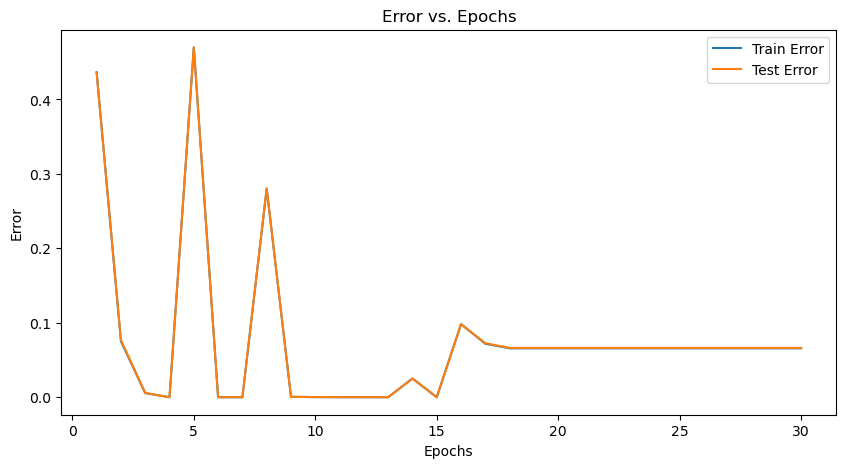

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

epochs = range(1, 31)  

train_errors = []
test_errors = []

for epoch in epochs:
    mlp = MLPClassifier(hidden_layer_sizes=(12,)*20, max_iter=epoch, activation='relu', random_state=123)
    mlp.fit(X_train, y_train)

    train_pred = mlp.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_errors.append(1 - train_accuracy)

    test_pred = mlp.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_errors.append(1 - test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_errors, label='Train Error')
plt.plot(epochs, test_errors, label='Test Error')
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()


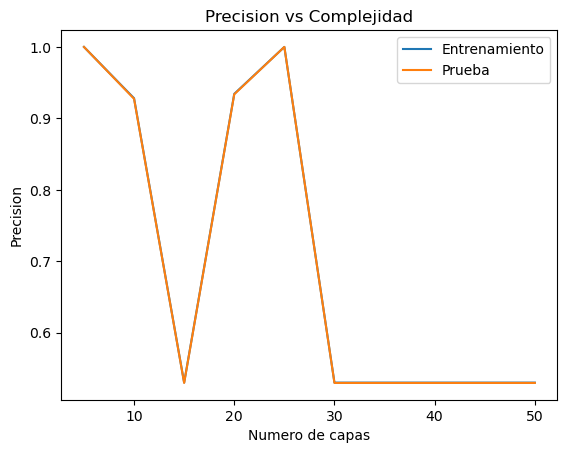

In [21]:

capas = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
res_train = []
res_test = []

for i in capas:
    mlp1 = MLPClassifier(hidden_layer_sizes = (12,)*i, max_iter = 3000, activation='relu', random_state=123)
    mlp1.fit(X_train, y_train)

    y_pred_train = mlp1.predict(X_train)
    res_train.append(accuracy_score(y_train, y_pred_train))

    y_pred_test = mlp1.predict(X_test)
    res_test.append(accuracy_score(y_test, y_pred_test))

plt.plot(capas, res_train, label='Entrenamiento')
plt.plot(capas, res_test, label='Prueba')
plt.title('Precision vs Complejidad')
plt.xlabel('Numero de capas')
plt.ylabel('Precision')
plt.legend()
plt.show()



In [14]:
# Dividir el dataset en X e y
y = data_redes['edadHombre']
X = data_redes.drop(['edadHombre'], axis=1)

# 30% de los datos para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=123)

In [26]:
scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

mlp1 = MLPClassifier(hidden_layer_sizes = (12,)*20, max_iter = 3000, activation='logistic', random_state=123)
mlp1.fit(X_train, y_train)

MLPClassifier(activation='logistic',
              hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                                  12, 12, 12, 12, 12, 12, 12, 12, 12),
              max_iter=3000, random_state=123)

In [27]:
y_pred = mlp1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)

print(cm1)
print()

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))

[[    0     0 26294]
 [    0     0 29379]
 [    0     0 62724]]

Accuracy:  0.5297769369156313
Precision:  0.17659231230521044
Recall:  0.3333333333333333


/Users/saramariapaguagagonzales/opt/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
